## Basic import statement

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

arrest = pd.read_csv("arrests.csv")
arrest.sample(5)

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
38129,2023064,20000809,30.0,M,B,2020-01-02T02:13:00,"Frankstown AV & N Homewood AV Pittsburgh, PA 1...",3925 Receiving Stolen Property.,"60 Block Greensburgh ST Delmont, PA 15626",Outside City,OSC,5599.0,NaN,NaN,0.000000,0.000000
20776,2000889,18087113,14.0,F,B,2018-05-14T10:00:00,"600 Block 1ST AV PITTSBURGH, PA 15219",2702 Aggravated Assault. / 5503 Disorderly Con...,"7100 Block REYNOLDS ST PITTSBURGH, PA 15208",Point Breeze,4,1406.0,9.0,3.0,-79.905396,40.446603
33075,2016681,18073390,41.0,M,B,2019-07-28T10:20:00,"900 Block 2nd AV Pittsburgh, PA 15219",5104 Resisting Arrest or Other Law Enforcement...,"200 Block Kirk AV Pittsburgh, PA 15210",Carrick,3,2904.0,4.0,3.0,-79.976818,40.388487
46844,2035341,20234405,50.0,F,B,2021-03-02T15:10:00,"1200 Block Western AV Pittsburgh, PA 15233",2501 Criminal Homicide. / 5510 Abuse of Corpse.,"3200 Block California AV Pittsburgh, PA 15212",Brighton Heights,1,2703.0,1.0,1.0,-80.037828,40.473282
25044,2006304,18200989,25.0,M,W,2018-10-10T19:07:00,"1800 Block Letsche ST Pittsburgh, PA 15214",13(a)(16) Possession of Controlled Substance,"1800 Block Letsche ST Pittsburgh, PA 15214",Fineview,1,2509.0,NaN,NaN,0.000000,0.000000


## Lists all the neighborhoods

In [2]:
towns = arrest["INCIDENTNEIGHBORHOOD"].unique()
print (towns)

['Bloomfield' 'Outside City' 'Westwood' 'East Allegheny' 'Crafton Heights'
 'Greenfield' 'Brookline' 'Regent Square' 'East Liberty' nan 'East Hills'
 'Carrick' 'Allegheny Center' 'South Side Flats' 'Sheraden'
 'East Carnegie' 'Golden Triangle/Civic Arena' 'Point Breeze North'
 'Perry South' 'Allentown' 'North Shore' 'Marshall-Shadeland'
 'Central Oakland' 'Middle Hill' 'Strip District'
 'Lincoln-Lemington-Belmar' 'Central Northside' 'Troy Hill-Herrs Island'
 'Highland Park' 'Homewood North' 'Northview Heights' 'Brighton Heights'
 'Hazelwood' 'Perry North' 'Bedford Dwellings' 'Elliott' 'Beechview'
 'Fineview' 'Glen Hazel' 'Spring Hill-City View' 'Bluff' 'Manchester'
 'Homewood West' 'Outside County' 'Point Breeze' 'Homewood South'
 'Squirrel Hill South' 'Terrace Village' 'Upper Lawrenceville' 'Arlington'
 'South Side Slopes' 'Lower Lawrenceville' 'Garfield' 'Lincoln Place'
 'Larimer' 'Mount Washington' 'California-Kirkbride' 'Banksville'
 'Bon Air' 'South Shore' 'Beltzhoover' 'Knoxville

## Counts the number of arrests in each neighborhood

In [11]:
#arrest['INCIDENTNEIGHBORHOOD'].value_counts().ssort_values(ascending=True)
severity = arrest['OFFENSES'].str.contains('Harassment|Stalking|Homicide|Assault|Firearms|Missiles|Reckless Driving|Terroristic Threats|Kidnapping|Murder|Strangulation', regex = True).fillna(False)
crimes = arrest[severity]
#pd.set_option('display.max_colwidth', None)
#crimes['OFFENSES']
crimes

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
6,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
10,1974696,16149661,30.0,F,B,2016-08-11T18:00:00,"7900 Block Aber RD Verona, PA 15147",2701 Simple Assault. / 3304 Criminal Mischief....,"600 Block Sickles ST Pittsburgh, PA 15221",East Hills,5,1306.0,9.0,2.0,-79.882470,40.451472
11,1974704,16146903,45.0,M,W,2016-08-07T13:40:00,"300 Block Newett ST Pittsburgh, PA 15210",2701 Simple Assault.,"300 Block Newett ST Pittsburgh, PA 15210",Carrick,3,2901.0,4.0,3.0,-79.991712,40.396558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54473,2046405,21231580,29.0,M,B,2022-03-24T17:12:00,"1700 Block Beaver ST Pittsburgh, PA 15132",2501 Criminal Homicide. / 6105(a)(1) Persons n...,Hamilton AV,Homewood South,5,1303.0,NaN,NaN,0.000000,0.000000
54475,2046419,22039894,24.0,M,B,2022-03-23T13:11:00,"400 Block Mt Pleasant RD Pittsburgh, PA 15214",903 Criminal Conspiracy. / 2501 Criminal Homic...,"Bausman ST & Ibis WY Pittsburgh, PA 15210",Knoxville,3,3001.0,3.0,5.0,-79.988557,40.414427
54477,2046421,22036912,24.0,M,W,2022-03-12T23:56:00,Zone 2,"2709(a)(1) Harassment by Physical Contact, or ...",Zone 2,NaN,2,NaN,NaN,NaN,NaN,NaN
54478,2046422,22036925,41.0,M,B,2022-03-12T23:55:00,"100 Block N Craig ST Pittsburgh, PA 15213",2702 Aggravated Assault. / 5104 Resisting Arre...,"4600 Block Centre AV Pittsburgh, PA 15213",North Oakland,4,507.0,6.0,3.0,-79.951992,40.451910


## Graphs data

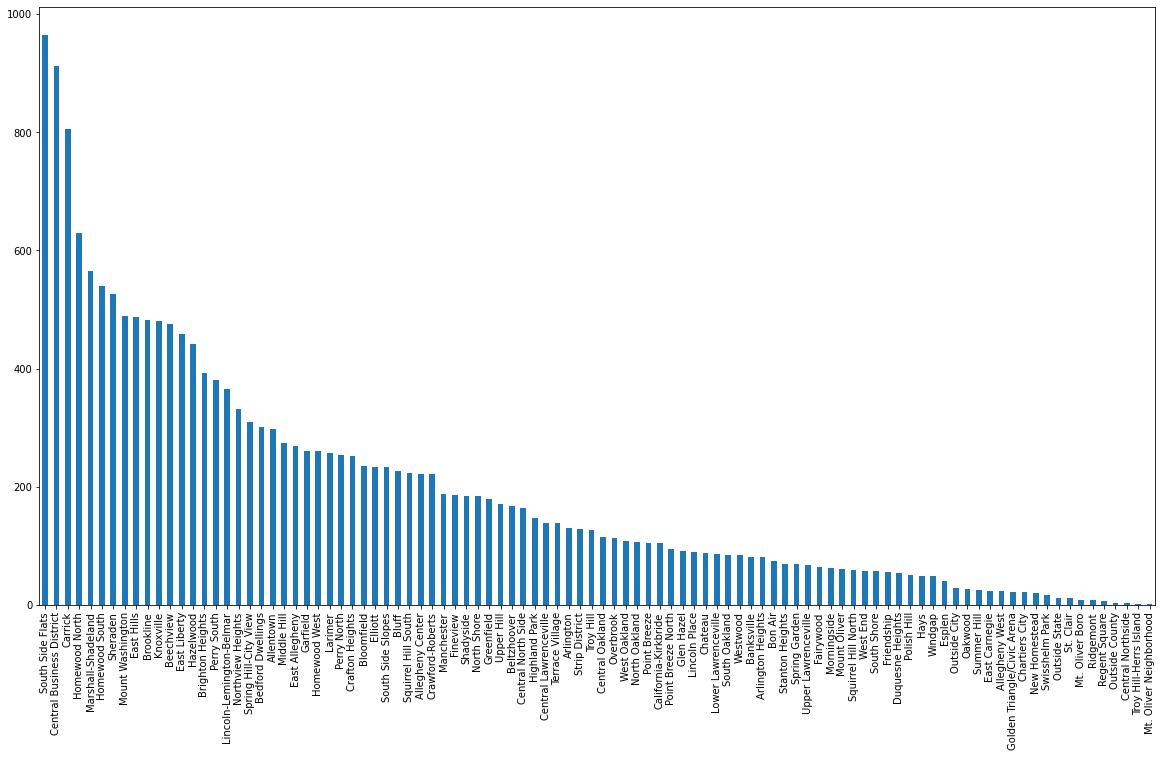

In [12]:
crimes["INCIDENTNEIGHBORHOOD"].value_counts().sort_values(ascending = False).plot.bar(figsize=(20,11))